In [1]:
import pandas as pd
import os

import numpy as np

from script_tables import *

import seaborn as sns


In [9]:
from pathlib import Path

In [14]:
path=Path("Results_rondrit016.csv")
new_path=path.with_name(path.stem+ "_fittest_" +path.suffix)
print(path,new_path)

Results_rondrit016.csv Results_rondrit016_fittest_.csv


In [2]:
current_directory=os.getcwd()
tables_directory=os.path.join(os.path.dirname(current_directory),"Results")
table_name="Results_rondrit016.csv"

table_path=os.path.join(tables_directory,table_name)



In [3]:
assert os.path.isfile(table_path) , "Path not correctly defined"
res_table=pd.read_csv(table_path)
# res_table=res_table.drop(columns='Unnamed: 0')


In [4]:
res_table.head()

,NIND,ELITIST,PR_CROSS,PR_MUT,Av_Best,Peak_Best,Fit_var,Eff_1,Eff_2
0,50,0.0,0.5,0.00,3.525537,3.349954,0.000120,0.023058,0.001624
1,50,0.0,0.5,0.05,3.459540,3.382785,0.000028,0.023213,0.001605
2,50,0.0,0.5,0.10,3.466937,3.349954,0.000047,0.023252,0.001540
3,50,0.0,0.5,0.20,3.638014,3.377140,0.000124,0.023114,0.001485
4,50,0.0,0.7,0.00,3.754263,3.438791,0.000105,0.023031,0.001665


In [5]:
res_table=res_table.drop(columns={"Eff_2","Fit_var"})
res_table["Av_Best"]=res_table["Av_Best"].apply(lambda x: 1/x )
res_table["Peak_Best"]=res_table["Peak_Best"].apply(lambda x: 1/x )

res_table.head()

,NIND,ELITIST,PR_CROSS,PR_MUT,Av_Best,Peak_Best,Eff_1
0,50,0.0,0.5,0.00,0.283645,0.298512,0.023058
1,50,0.0,0.5,0.05,0.289056,0.295614,0.023213
2,50,0.0,0.5,0.10,0.288439,0.298512,0.023252
3,50,0.0,0.5,0.20,0.274875,0.296109,0.023114
4,50,0.0,0.7,0.00,0.266364,0.290800,0.023031


In [6]:
metric_list=["Av_Best","Eff_1"]
norm_table=normalise_metrics(metric_list,res_table)

In [15]:
norm_table['M'] = norm_table.apply(lambda row: (0.5*(row["Av_Best_unit"]+row["Eff_1_unit"])), axis=1)
norm_table.sort_values("M",ascending=False)[:10]

,NIND,ELITIST,PR_CROSS,PR_MUT,Av_Best,Peak_Best,Eff_1,Av_Best_unit,Eff_1_unit,M
43,50,0.10,0.9,0.20,0.293634,0.298512,0.024063,0.914835,0.991597,0.953216
51,50,0.20,0.5,0.20,0.293761,0.298512,0.023991,0.917372,0.987684,0.952528
39,50,0.10,0.7,0.20,0.293064,0.298512,0.024099,0.903429,0.993599,0.948514
19,50,0.05,0.5,0.20,0.293988,0.298512,0.023725,0.921934,0.973196,0.947565
63,50,0.20,1.0,0.20,0.293202,0.298512,0.023956,0.906184,0.985792,0.945988
38,50,0.10,0.7,0.10,0.292840,0.298512,0.024084,0.898941,0.992773,0.945857
22,50,0.05,0.7,0.10,0.293299,0.298512,0.023819,0.908122,0.978323,0.943223
23,50,0.05,0.7,0.20,0.292877,0.298512,0.023973,0.899668,0.986706,0.943187
61,50,0.20,1.0,0.05,0.292778,0.298512,0.024000,0.897684,0.988214,0.942949
54,50,0.20,0.7,0.10,0.292002,0.298512,0.024086,0.882143,0.992881,0.937512


In [10]:
# res_table['M'] = res_table.apply(lambda row: ((1/(row['Av_Best'] + row['Fit_var']))*row["Eff_unit"]), axis=1)
res_table["Av_Best"]=1./res_table["Av_Best"]
res_table.head()
res_table['M'] = res_table.apply(lambda row: ((row["Av_Best"]-row["Fit_var"])*row["Eff_1"]), axis=1)
res_table.sort_values("Av_Best",ascending=False)

,NIND,ELITIST,PR_CROSS,PR_MUT,Av_Best,Peak_Best,Fit_var,Eff_1,Eff_2,M
11,50,0.00,0.9,0.20,4.032921,3.819791,0.000059,0.022566,0.001635,0.091006
12,50,0.00,1.0,0.00,4.014075,3.807015,0.000053,0.022378,0.001709,0.089824
15,50,0.00,1.0,0.20,4.013285,3.707902,0.000100,0.022369,0.001746,0.089771
14,50,0.00,1.0,0.10,4.008668,3.794653,0.000059,0.022307,0.001600,0.089419
10,50,0.00,0.9,0.10,4.001245,3.421577,0.000148,0.022386,0.001557,0.089567
79,100,0.00,1.0,0.20,3.970905,3.669906,0.000074,0.011480,0.000773,0.045584
48,50,0.20,0.5,0.00,3.958297,3.443293,0.000446,0.022960,0.001062,0.090873
77,100,0.00,1.0,0.05,3.955564,3.653385,0.000057,0.011580,0.000859,0.045806
13,50,0.00,1.0,0.05,3.947190,3.467631,0.000144,0.022667,0.001831,0.089468
8,50,0.00,0.9,0.00,3.943926,3.707833,0.000103,0.022607,0.001560,0.089157


In [14]:
res_table["Av_Best"]=res_table["Av_Best"].apply(lambda x: 1/x )
new_table=res_table
new_table.sort_values("Av_Best",ascending=False)

,NIND,ELITIST,PR_CROSS,PR_MUT,Av_Best,Peak_Best,Fit_var,Eff_1,Eff_2,M
253,200,0.20,1.0,0.05,0.297886,3.349954,0.000002,0.006280,0.000403,0.021083
252,200,0.20,1.0,0.00,0.297715,3.349954,0.000003,0.006331,0.000386,0.021266
249,200,0.20,0.9,0.05,0.297684,3.349954,0.000007,0.006298,0.000404,0.021157
236,200,0.10,1.0,0.00,0.297499,3.349954,0.000003,0.006265,0.000379,0.021060
255,200,0.20,1.0,0.20,0.297393,3.349954,0.000006,0.006255,0.000392,0.021034
254,200,0.20,1.0,0.10,0.297289,3.349954,0.000006,0.006251,0.000396,0.021027
146,150,0.05,0.5,0.10,0.297190,3.349954,0.000004,0.008326,0.000519,0.028015
233,200,0.10,0.9,0.05,0.297166,3.349954,0.000005,0.006277,0.000390,0.021121
151,150,0.05,0.7,0.20,0.297152,3.349954,0.000005,0.008268,0.000530,0.027824
248,200,0.20,0.9,0.00,0.297139,3.349954,0.000005,0.006337,0.000397,0.021325


## Plotting

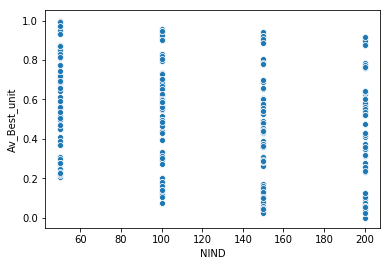

In [6]:
sns.scatterplot(x="NIND",y="M",data=res_table)


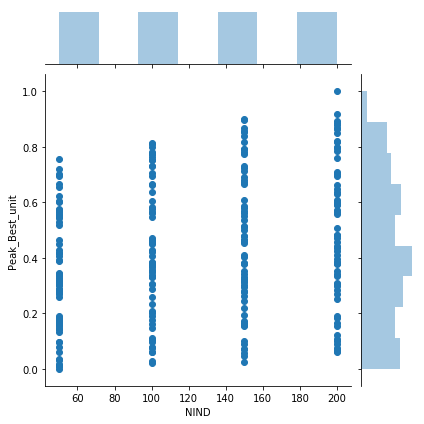

In [8]:
# 2D KDE plot
sns.jointplot(x=norm_table["NIND"], y=norm_table["Peak_Best_unit"])

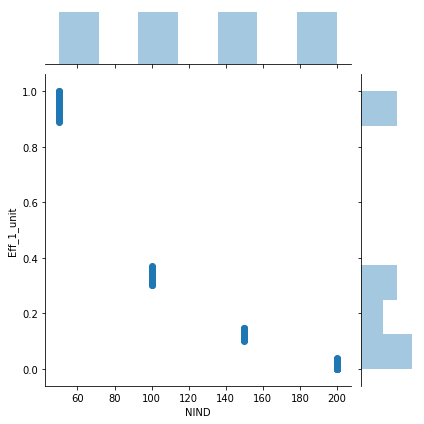

In [45]:
# 2D KDE plot
sns.jointplot(x=norm_table["NIND"], y=norm_table["Eff_1_unit"])

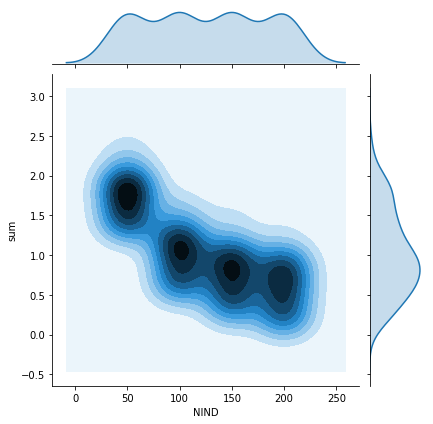

In [9]:
sns.jointplot(x="NIND", y="sum",kind="kde",data=res_table)

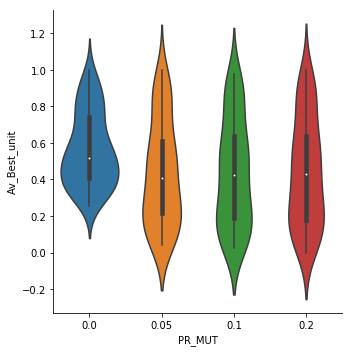

In [64]:
sns.catplot(x="PR_MUT",y="Av_Best_unit",kind='violin',data=res_table)

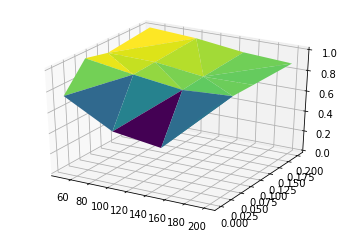

In [66]:
# library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

y="NIND"
x="PR_MUT"
z="Av_Best_unit"
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(res_table[y], res_table[x], res_table[z], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(res_table[y], res_table[x], res_table[z], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
# plt.show()
 
# # Rotate it
ax.view_init(30, 45)
plt.show()
 
# # Other palette
ax.plot_trisurf(res_table[y], res_table[x], res_table[z], cmap=plt.cm.jet, linewidth=0.01)
plt.show()
